In [1]:
%run setup.py

In [6]:
fakestars = pd.read_csv('../data/fDnu_model_physics_data.csv')

In [8]:
fakestars['fDnu_t'] = fakestars['fDnu']
fakestars['e_fDnu_t'] = fakestars['e_fDnu']


0

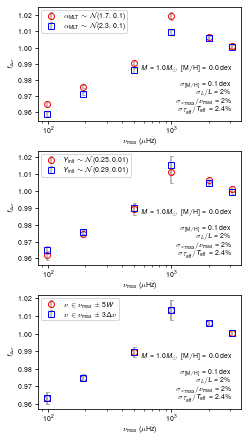

In [11]:
# fig, axes = plt.subplots(figsize=[18,5], nrows=1, ncols=3, squeeze=False)
fig, axes = plt.subplots(figsize=mnras_size(column='one', ratio=1.8), 
                         nrows=3, ncols=1, squeeze=False,
                         constrained_layout=True)
axes = axes.reshape(-1)

# params = [[mass, feh] for mass in [1.0] for feh in [-0.4, 0., 0.4]]
# params = [[mass, feh] for mass in [1.0] for feh in [0]]
# mass, feh = params[iax][0], params[iax][1]
mass, feh = 1.0, 0.
idx = (fakestars['mass']==mass) & (fakestars['feh']==feh)
    
params = [{'yval':['fDnu_1.70', 'fDnu_2.30'],
           'label':[r'$\alpha_{\rm MLT}\sim\mathcal{N}(1.7,0.1)$', r'$\alpha_{\rm MLT}\sim\mathcal{N}(2.3,0.1)$']},
          {'yval':['fDnu_0.25', 'fDnu_0.29'],
           'label':[r'$Y_{\rm init}\sim\mathcal{N}(0.25,0.01)$', r'$Y_{\rm init}\sim\mathcal{N}(0.29,0.01)$']},
          {'yval':['fDnu', 'fDnu_t'],
           'label':[r'$\nu \in \nu_{\rm max}\pm5W$', r'$\nu \in \nu_{\rm max}\pm3\Delta\nu$']}]
          
for iax, ax in enumerate(axes):
    param = params[iax]
    ax.errorbar(
        fakestars.loc[idx,'numax'], 
        fakestars.loc[idx,param['yval'][0]],
        yerr=fakestars.loc[idx,'e_'+param['yval'][0]],
        mec='r', 
        marker='o', 
        label=param['label'][0],
        ecolor='darkgray', mfc='none', linestyle='none', capsize=1.5
    )

    ax.errorbar(
        fakestars.loc[idx,'numax'], 
        fakestars.loc[idx,param['yval'][1]],
        yerr=fakestars.loc[idx,'e_'+param['yval'][1]],
        mec='b', 
        marker='s', 
        label=param['label'][1], 
        ecolor='darkgray', mfc='none', linestyle='none', capsize=1.5
    )

    ax.legend(fontsize=fontsize)
    ax.set_xlabel(r'$\nu_{\rm max}$ ($\mu$Hz)')
    ax.set_ylabel(r'$f_{\Delta\nu}$')
    ax.set_xscale('log')
    ax.text(
        0.95, 0.0,
        '$M={:0.1f}$'.format(mass)+r'$M_\odot$\ \ ${\rm [M/H]} ='+'{:0.1f}$ dex'.format(feh)+'\n\n'+
        r'$\sigma_{\rm [M/H]}=0.1$ dex'+'\n'+
        r'$\sigma_L/L=2\%$'+'\n'+
        r'$\sigma_{\nu_{\rm max}}/{\nu_{\rm max}}=2\%$'+'\n'+
        r'$\sigma_{T_{\rm eff}}/{T_{\rm eff}}=2.4\%$'+'\n',
        ha='right', va='bottom', transform=ax.transAxes
    )

# plt.savefig('fdnu_model_physics.jpg',dpi=150)

filename = 'Fig.B_fDnu_error.pdf'
plt.savefig(filename)
os.system(to_overleaf(filename, 'figures'))